In [576]:
import pandas as pd
import numpy as np
from fpgrowth_py import fpgrowth
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
#import nltk
#import spacy
#!python -m spacy download en_core_web_sm
#import en_core_web_sm
#nlp = spacy.load("en_core_web_sm")

In [553]:
nba_tweets_classified = pd.read_csv('Bert_Classified_NBA_tweets')
nba_hate_tweets = pd.read_csv('Bert_Classified_NBA_hate_tweets')
nba_tweets_classified.drop(nba_tweets_classified.columns[0],axis =1,inplace=True)
nba_hate_tweets.drop(nba_hate_tweets.columns[0], axis =1, inplace= True)
nba_tweets_classified.head()
print(len(nba_tweets_classified))

/Users/edinamklutse/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


1027717


In [555]:
nba_tweets_classified['category'].value_counts()

offensive_language    826898
neither               184033
hate_speech            16786
Name: category, dtype: int64

No handles with labels found to put in legend.


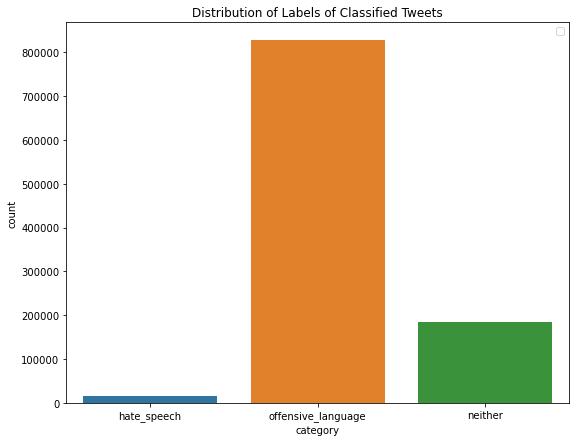

In [560]:
plt.figure(figsize=(9,7))
sns.countplot(data = nba_tweets_classified, x = 'category')
plt.title("Distribution of Labels of Classified Tweets")

In [31]:
nba_hate_tweets.head()

,tweets,label,category
0,Precious Achiuwa block Kevin Durant come dey b...,0,hate_speech
1,it's always the weak ass niggas who hurt our s...,0,hate_speech
2,Precious Achiuwa is balling this nigga Embiid ...,0,hate_speech
3,@Dolgo13 Dynamic Duo they said we was the Roma...,0,hate_speech
4,it's always the weak ass niggas who hurt our s...,0,hate_speech


In [32]:
#remove stopwords and other meaningless expressions from data to be able to to be used for hate speech
items = []
stopwords = set(STOPWORDS)
stopwords.add("RT")
stopwords.add(" ")
stopwords.add('')
stopwords.add("&amp;")
hate_tweets = nba_hate_tweets['tweets'].tolist()
for tweet in hate_tweets:
    raw = tweet.split(" ")
    processed = [word.lower() for word in raw if word not in stopwords]
    items.append(processed)
print(items)

[['precious', 'achiuwa', 'block', 'kevin', 'durant', 'come', 'dey', 'believe', 'himself.\nnigger', 'legit', 'ducked', 'saw', 'lebron', 'james', 'coming', '😂'], ['always', 'weak', 'ass', 'niggas', 'hurt', 'stars', '😔', 'solomon', 'hill', 'bron,', 'precious', 'achiuwa', 'embiid,', 'al', 'horford', 'curry.', 'unfortunate'], ['precious', 'achiuwa', 'balling', 'nigga', 'embiid', 'omfg', 'lmfaoooo'], ['@dolgo13', 'dynamic', 'duo', 'said', 'romans', 'judas\nbro', 'tall', 'reason', 'precious', 'achiuwa\nyou', 'really', 'purchasing', 'tech', 'fleeces', 'boy', 'stupid', '\nyou', 'slave', 'normalcy', 'last', 'name', 'nguyen🤦🏿\u200d♂️', 'https://t.co/tz1vf1czde'], ['always', 'weak', 'ass', 'niggas', 'hurt', 'stars', '😔', 'solomon', 'hill', 'bron,', 'precious', 'achiuwa', 'embiid,', 'al', 'horford', 'curry.', 'unfortunate'], ['precious', 'achiuwa', 'better', 'shooter', 'than', 'bam', 'fatabayo', 'par', 'reilly', 'racist', 'ass', 'can', 'suck', 'my', 'dick'], ['always', 'weak', 'ass', 'niggas', 'hur

In [33]:
#Using Frequent Pattern Mining to find out if ther are any interesting association rules
freqItemSet, rules = fpgrowth(items, minSupRatio=0.005, minConf=0.2)
print(rules) 

[[{'@thetraeyoung'}, {'@adidashoops'}, 0.5217391304347826], [{'@adidashoops'}, {'@thetraeyoung'}, 0.9882352941176471], [{'@nba'}, {'@adidashoops'}, 0.27722772277227725], [{'@adidashoops'}, {'@nba'}, 0.9882352941176471], [{'@thetraeyoung'}, {'@nba', '@adidashoops'}, 0.5217391304347826], [{'@nba'}, {'@thetraeyoung', '@adidashoops'}, 0.27722772277227725], [{'@adidashoops'}, {'@thetraeyoung', '@nba'}, 0.9882352941176471], [{'@thetraeyoung', '@nba'}, {'@adidashoops'}, 1.0], [{'@thetraeyoung', '@adidashoops'}, {'@nba'}, 1.0], [{'@nba', '@adidashoops'}, {'@thetraeyoung'}, 1.0], [{'haslem'}, {'udonis'}, 1.0], [{'udonis'}, {'haslem'}, 0.7798165137614679], [{'doug'}, {'mcdermott'}, 0.7523809523809524], [{'mcdermott'}, {'doug'}, 0.9186046511627907], [{'patrick'}, {'beverley'}, 0.44], [{'beverley'}, {'patrick'}, 1.0], [{'wiggins'}, {'andrew'}, 0.8775510204081632], [{'andrew'}, {'wiggins'}, 0.6771653543307087], [{'jimmy'}, {'butler'}, 0.7333333333333333], [{'butler'}, {'jimmy'}, 0.8979591836734694]

In [561]:
print(len(freqItemSet))
print(len(rules))

667
283


In [215]:
print(freqItemSet)

[{'😭'}, {'stephen'}, {'@cjmccollum'}, {'beat'}, {"y'all"}, {'are'}, {'gay.'}, {'cant'}, {'@adidashoops'}, {'@thetraeyoung', '@adidashoops'}, {'@nba', '@adidashoops'}, {'@thetraeyoung', '@nba', '@adidashoops'}, {'haslem'}, {'haslem', 'udonis'}, {'on'}, {'hell'}, {'first'}, {'makes'}, {'care'}, {'af'}, {'gets'}, {'@jalensuggs'}, {'cunt'}, {'saying'}, {'yall'}, {'mcdermott'}, {'doug', 'mcdermott'}, {'martin'}, {'@dame_lillard'}, {'playing'}, {'stand'}, {'beverley'}, {'patrick', 'beverley'}, {'5'}, {'dude'}, {'free'}, {'much'}, {'@kylekuzma'}, {'@rudygobert27'}, {'end'}, {'start'}, {'kelly'}, {'two'}, {'players'}, {'team.'}, {'en'}, {'coach'}, {'doesn’t'}, {'fool'}, {'faggot.'}, {'day'}, {'gary'}, {'nobody'}, {'told'}, {'isaiah'}, {'embiid'}, {'poole'}, {'everyone'}, {'lakers'}, {'years'}, {'kill'}, {'gotta'}, {'thought'}, {'?'}, {'zach'}, {'head'}, {'biggest'}, {'gay,'}, {'thing'}, {'@bleacherreport'}, {'life'}, {'nothing'}, {'oh'}, {'how'}, {'made'}, {'simmons'}, {'jews'}, {'bradley'}, {

In [40]:
#investigatig the case of Trae Young and Adidas
for tweet in hate_tweets:
    #print(tweet.lower())
    tweet = tweet.lower()
    if '@adidashoops' in tweet and '@thetraeyoung' in tweet.lower():
        print(tweet)

@adidashoops @nba @jalengreen @evanmobley @jalensuggs @thetraeyoung i'm joining others who no longer will buy your products due to your representatives being antisemitic. waiting weeks to make any effort to rectify this gross hatred shows you don't give a sh*t about jews.
@adidashoops @adidas @nba @jalengreen @evanmobley @jalensuggs @thetraeyoung you critizice gays, you are homophobic; critize women, you are misogynist; critizice blacks, you are racist; critizice jews, you are antisemitic; criticize white, straight man, you are a hero. look at the twisted society created with the money of the people kanye is critizicing.
@adidashoops @nba @jalengreen @evanmobley @jalensuggs @thetraeyoung 🤣everyone ready to drop adidas for some stupid shit nobody really actually cares about. only to "threaten" to use another brand...like they all dont use cheap chinese slave labor. ahh gotta love the uneducated cancel culture.
@adidashoops @nba @jalengreen @evanmobley @jalensuggs @thetraeyoung yall must

In [11]:
#AdidasAthletes getting hate because Adidas are under alot of scrutiny currently due to:
    #being accused of using cheap chinese labor
    #Being accused of being racists because of the issue with Kanye West

In [41]:
print(freqItemSet)

[{'😭'}, {'stephen'}, {'@cjmccollum'}, {'beat'}, {"y'all"}, {'are'}, {'gay.'}, {'cant'}, {'@adidashoops'}, {'@thetraeyoung', '@adidashoops'}, {'@nba', '@adidashoops'}, {'@thetraeyoung', '@nba', '@adidashoops'}, {'haslem'}, {'haslem', 'udonis'}, {'on'}, {'hell'}, {'first'}, {'makes'}, {'care'}, {'af'}, {'gets'}, {'@jalensuggs'}, {'cunt'}, {'saying'}, {'yall'}, {'mcdermott'}, {'doug', 'mcdermott'}, {'martin'}, {'@dame_lillard'}, {'playing'}, {'stand'}, {'beverley'}, {'patrick', 'beverley'}, {'5'}, {'dude'}, {'free'}, {'much'}, {'@kylekuzma'}, {'@rudygobert27'}, {'end'}, {'start'}, {'kelly'}, {'two'}, {'players'}, {'team.'}, {'en'}, {'coach'}, {'doesn’t'}, {'fool'}, {'faggot.'}, {'day'}, {'gary'}, {'nobody'}, {'told'}, {'isaiah'}, {'embiid'}, {'poole'}, {'everyone'}, {'lakers'}, {'years'}, {'kill'}, {'gotta'}, {'thought'}, {'?'}, {'zach'}, {'head'}, {'biggest'}, {'gay,'}, {'thing'}, {'@bleacherreport'}, {'life'}, {'nothing'}, {'oh'}, {'how'}, {'made'}, {'simmons'}, {'jews'}, {'bradley'}, {

In [357]:
#seperating frequent itemsets into categories
NBA = pd.read_csv("NBA Stats 202223 All Player Statistics in one Page.csv",header = 1)
players =  list(NBA['FULL NAME'])
players_list = [player.lower().split(" ") for player in players]
hated_players  = []
hated_accounts = []
hate_adjectives = []
for itemset in freqItemSet:
    for item in itemset:
        if item.startswith('@'):
            hated_accounts.append(item)
        
        # checking if frequent itemset is a player
        for player in players_list:
            if item in player:
                hated_players.append(" ".join(player))
hated_players=list(set(hated_players))  
hated_accounts=list(set(hated_accounts))
hated_accounts.remove('@nba')
hated_accounts.remove('@bleacherreport')
hated_accounts.remove('@adidashoops')
print(hated_players)    

['harrison barnes', 'kevin huerter', 'frank ntilikina', 'jalen green', 'jalen duren', 'ish smith', 'danuel house jr.', 'christian wood', 'coby white', 'wendell carter jr.', 'kevin durant', 'tobias harris', 'davis bertans', 'jordan clarkson', 'dennis smith jr.', 'tyty washington jr.', 'malcolm brogdon', 'joel embiid', 'joe harris', 'patty mills', 'patrick beverley', 'andre drummond', 'jordan schakel', 'will barton', 'jarrett allen', 'ben simmons', 'troy brown jr.', 'isaiah livers', 'johnny davis', 'vince williams jr.', 'zach collins', 'derrick rose', 'caleb martin', 'deandre ayton', 'a.j. green', 'jordan goodwin', 'jalen brunson', 'jack white', 'isaiah jackson', 'aaron wiggins', 'jimmy butler', 'jordan hall', 'josh green', 'anthony davis', 'isaiah stewart', 'javonte green', 'tyrese martin', 'reggie jackson', 'jordan nwora', 'frank kaminsky', 'doug mcdermott', 'greg brown iii', 'ron harper jr.', 'scottie barnes', 'john konchar', 'justin jackson', 'kevin love', 'andrew wiggins', 'austin r

In [358]:
shortened_names={'karl-anthony towns':['kat'],"d'angelo russell":['dlo','dloading'], 
                'devin booker':['book'], 'kyle kuzma':['kuz'], 'anthony edwards':['ant'],
                'stephen curry' : ['steph'], 'patrick beverley':['pat bev'], 'anthony davis':['ad'],
                'paul george': ['pg13'],'draymond green':['dray','draymond'], 'lebron james':['bron','lbj','king james','lebron'], 
                'kevin durant': ['kd'], 'chris paul':['cp3','cp'], 'russell westbrook':['russ'],
                'giannis antetokounmpo':['giannis'], 'zion williamson':['zion'], 'damian lillard':['dame'],
                'cj mccollum':['cj'], 'ja morant':['ja']}
shortened_names

{'karl-anthony towns': ['kat'],
 "d'angelo russell": ['dlo', 'dloading'],
 'devin booker': ['book'],
 'kyle kuzma': ['kuz'],
 'anthony edwards': ['ant'],
 'stephen curry': ['steph'],
 'patrick beverley': ['pat bev'],
 'anthony davis': ['ad'],
 'paul george': ['pg13'],
 'draymond green': ['dray', 'draymond'],
 'lebron james': ['bron', 'lbj', 'king james', 'lebron'],
 'kevin durant': ['kd'],
 'chris paul': ['cp3', 'cp'],
 'russell westbrook': ['russ'],
 'giannis antetokounmpo': ['giannis'],
 'zion williamson': ['zion'],
 'damian lillard': ['dame'],
 'cj mccollum': ['cj'],
 'ja morant': ['ja']}

In [359]:
ll_hated_players = []
for player in hated_players:
    player_l = player.split(" ")[-1:]
    if 'jr.' in player.split() or 'ii' in player.split():
        player_l = [" ".join(player.split(" ")[:-1])]
    keys = list(shortened_names.keys())
    if player in keys:
        player_l.extend(shortened_names[player])
    player_l.append(player)
    ll_hated_players.append(player_l)
print(ll_hated_players)

[['barnes', 'harrison barnes'], ['huerter', 'kevin huerter'], ['ntilikina', 'frank ntilikina'], ['green', 'jalen green'], ['duren', 'jalen duren'], ['smith', 'ish smith'], ['danuel house', 'danuel house jr.'], ['wood', 'christian wood'], ['white', 'coby white'], ['wendell carter', 'wendell carter jr.'], ['durant', 'kd', 'kevin durant'], ['harris', 'tobias harris'], ['bertans', 'davis bertans'], ['clarkson', 'jordan clarkson'], ['dennis smith', 'dennis smith jr.'], ['tyty washington', 'tyty washington jr.'], ['brogdon', 'malcolm brogdon'], ['embiid', 'joel embiid'], ['harris', 'joe harris'], ['mills', 'patty mills'], ['beverley', 'pat bev', 'patrick beverley'], ['drummond', 'andre drummond'], ['schakel', 'jordan schakel'], ['barton', 'will barton'], ['allen', 'jarrett allen'], ['simmons', 'ben simmons'], ['troy brown', 'troy brown jr.'], ['livers', 'isaiah livers'], ['davis', 'johnny davis'], ['vince williams', 'vince williams jr.'], ['collins', 'zach collins'], ['rose', 'derrick rose']

In [360]:
#creating a dictionary to eliminate player names which are in the list because of duplicates
hated_players_dict = {}
for name in ll_hated_players:
    #name_l = set(name.lower().split(" "))
    #print(name)
    hated_players_dict[name[-1]]=0
    for n in name:
        other = name.copy()
        other.remove(n)
        for tweet in hate_tweets:
            tweet_l = tweet.lower()
            #print(other)
            if " " in n and n in tweet_l:
                hated_players_dict[name[-1]] = hated_players_dict[name[-1]] + 1
            if n in tweet_l and (all(elem not in tweet_l  for elem in other)):
                 hated_players_dict[name[-1]] = hated_players_dict[name[-1]] + 1
                
        #if name_l.issubset(tweet_l) :
            
            #hated_players_dict[name] = hated_players_dict[name] + 1
            
print(hated_players_dict)

{'harrison barnes': 144, 'kevin huerter': 36, 'frank ntilikina': 37, 'jalen green': 516, 'jalen duren': 19, 'ish smith': 310, 'danuel house jr.': 6, 'christian wood': 139, 'coby white': 1035, 'wendell carter jr.': 18, 'kevin durant': 539, 'tobias harris': 448, 'davis bertans': 28, 'jordan clarkson': 74, 'dennis smith jr.': 82, 'tyty washington jr.': 0, 'malcolm brogdon': 123, 'joel embiid': 262, 'joe harris': 448, 'patty mills': 269, 'patrick beverley': 165, 'andre drummond': 141, 'jordan schakel': 0, 'will barton': 73, 'jarrett allen': 197, 'ben simmons': 137, 'troy brown jr.': 12, 'isaiah livers': 9, 'johnny davis': 299, 'vince williams jr.': 0, 'zach collins': 191, 'derrick rose': 96, 'caleb martin': 125, 'deandre ayton': 86, 'a.j. green': 516, 'jordan goodwin': 3, 'jalen brunson': 48, 'jack white': 1035, 'isaiah jackson': 207, 'aaron wiggins': 177, 'jimmy butler': 155, 'jordan hall': 83, 'josh green': 516, 'anthony davis': 3211, 'isaiah stewart': 35, 'javonte green': 516, 'tyrese m

In [503]:
twitter_handles = pd.read_csv('nba_twitter_handles.csv')
twitter_handles =  twitter_handles.astype('str')
for column in ['Player','Twitter']:
    twitter_handles[column] = twitter_handles[column].apply(str.lower)
twitter_handles.drop(twitter_handles.columns[0],inplace = True, axis = 1)
twitter_handles.head()

,Player,Twitter
0,alexis ajinça,ajincaalexis42
1,morris almond,freemoalmond
2,giannis antetokounmpo,giannis_an34
3,ömer aşık,asikomer
4,gustavo ayón,gustavo_ayon15


In [504]:
hated_accounts = [account.lower() for account in hated_accounts]
hated_players = [player.lower() for player in hated_players]

In [505]:
hated_accounts_dict = {}
for account in hated_accounts:
    hated_accounts_dict[account.lower()] = 0
    for tweet in hate_tweets:
        tweet_l = tweet.lower()
        if account in tweet_l:
            hated_accounts_dict[account.lower()] = hated_accounts_dict[account.lower()] + 1
print(hated_accounts_dict)     

{'@kdtrey5': 259, '@rudygobert27': 92, '@zionwilliamson': 121, '@russwest44': 141, '@thetraeyoung': 161, '@fchwpo': 141, '@dame_lillard': 88, '@cjmccollum': 86, '@stephencurry30': 161, '@kingjames': 315, '@giannis_an34': 142, '@kylekuzma': 90, '@joelembiid': 129, '@jalengreen': 101, '@kyrieirving': 341, '@devinbook': 134, '@jalensuggs': 86}


In [506]:
Nba_hated_df = twitter_handles.copy()
Nba_hated_df['no_of_hate_tweets_with_player_name'] = 0
Nba_hated_df['no_of_hate_tweets_with_player_handle'] = 0

In [507]:
for key, value in hated_accounts_dict.items():
    #print(key[1:], value)
    Nba_hated_df.loc[Nba_hated_df['Twitter'] == key[1:], 'no_of_hate_tweets_with_player_handle'] = value
    
for key, value in hated_players_dict.items():
    #print(key,value)
    Nba_hated_df.loc[Nba_hated_df['Player'] == key, 'no_of_hate_tweets_with_player_name'] = value

In [508]:
Nba_hated_df = Nba_hated_df[(Nba_hated_df['no_of_hate_tweets_with_player_name'] > 0) | (Nba_hated_df['no_of_hate_tweets_with_player_handle'] > 0)]
Nba_hated_df.head(100)

,Player,Twitter,no_of_hate_tweets_with_player_name,no_of_hate_tweets_with_player_handle
2,giannis antetokounmpo,giannis_an34,0,142
29,rudy gobert,rudygobert27,192,92
119,jamychal green,jmyke1,516,0
173,karl-anthony towns,karltowns,224,0
174,d'angelo russell,dloading,319,0
...,...,...,...,...
1271,seth curry,sdotcurry,380,0
1272,stephen curry,stephencurry30,246,161
1278,anthony davis,antdavis23,3211,0
1282,johnny davis,johnnydavis,299,0


In [509]:
Nba_hated_df['total_hate_tweets'] = Nba_hated_df['no_of_hate_tweets_with_player_name'] + Nba_hated_df['no_of_hate_tweets_with_player_handle']

In [510]:
remove_players = ['jeff green','josh green','jamychal green','jeff green','brook lopez','robin lopez','kevon harris','tobias harris','kevin love','cole anthony','derrick white','coby white','jack white','rudy gay',
                 'a.j. green','ish smith', 'jalen smith', 'a.j. green', 'joe harris', 'dru smith', 'grant williams', 'kenrich williams', 'jaylin williams', 'patrick williams', 'jalen williams	', 'javonte green', 'malcolm hill', 'tre jones', 
                 'tre jones', 'malcolm hill', 'terence davis', 'johnny davis', 'jalen williams','mark williams',
                 'dwight powell', 'norman powell','aaron gordon', 'eric gordon', 'zach collins', 'john collins','thaddeus young',
                 'aj griffin', 'blake griffin', 'seth curry', 'tyus jones','jamal murray','damian jones','tyus jones','herbert jones','kai jones',
                 'keegan murray','keon johnson','harrison barnes','scottie barnes','moses brown','bruce brown','keldon johnson','jalen johnson',
                 'james johnson','reggie jackson','justin jackson','isaiah jackson','nassir little','aaron wiggins','isaiah joe','tony bradley',
                 'jarrett allen','cody martin','tyrese martin','caleb martin','lamelo ball', 'isaiah mobley']

In [511]:
Nba_hated_df = Nba_hated_df[~Nba_hated_df['Player'].isin(remove_players)]

In [512]:
Nba_hated_df = Nba_hated_df = Nba_hated_df[~Nba_hated_df['Twitter'].isin(['devinbooker31'])]
Nba_hated_df = Nba_hated_df.sort_values(by = 'total_hate_tweets',ascending = False).head(50)

In [513]:
hate_words = ["nigger","nigga","bitch","b*tch","n*gg*r", "fuck", "bum","motherfucker","bollock","wanker", "dirty","lame",
              "bozo", "faggot", "pussy", "f*ck", "piece of shit","sh*t", "Bastard","cock","gay","lesbian", "fucker", "fool",
              "cunt", "asshole", "hate", "stupid","useless","fraud", "cost me", "owe me", "lost money", "liar",
             "trash", "ass", "overrated", "flop", "flopper","flopping","coward","choker", "choke artist", "loser",
             "choking", "selfish", "stat padder", "ball hog", "stat pad", "soft", "weak","retard", "prick", "dick","dickhead", "black", "fat", "niggers",
"jews","christian", "racist", "dirty", "white", "soft", "little", "small", "short"]

In [514]:
hate_adjectives = {}
for word in hate_words:
    hate_adjectives[word]=0
    for tweet in hate_tweets:
        tweet_l = tweet.lower()
        if word in tweet_l:
            hate_adjectives[word] += 1
print(hate_adjectives)
        

{'nigger': 904, 'nigga': 2601, 'bitch': 226, 'b*tch': 39, 'n*gg*r': 3, 'fuck': 2848, 'bum': 638, 'motherfucker': 347, 'bollock': 42, 'wanker': 9, 'dirty': 530, 'lame': 408, 'bozo': 87, 'faggot': 1147, 'pussy': 80, 'f*ck': 34, 'piece of shit': 92, 'sh*t': 138, 'Bastard': 0, 'cock': 273, 'gay': 1395, 'lesbian': 398, 'fucker': 855, 'fool': 137, 'cunt': 151, 'asshole': 722, 'hate': 1956, 'stupid': 900, 'useless': 227, 'fraud': 430, 'cost me': 24, 'owe me': 16, 'lost money': 3, 'liar': 406, 'trash': 381, 'ass': 2943, 'overrated': 241, 'flop': 114, 'flopper': 16, 'flopping': 38, 'coward': 1158, 'choker': 41, 'choke artist': 23, 'loser': 294, 'choking': 81, 'selfish': 409, 'stat padder': 5, 'ball hog': 49, 'stat pad': 7, 'soft': 236, 'weak': 204, 'retard': 434, 'prick': 337, 'dick': 469, 'dickhead': 125, 'black': 413, 'fat': 212, 'niggers': 203, 'jews': 130, 'christian': 161, 'racist': 468, 'white': 1035, 'little': 147, 'small': 25, 'short': 27}


In [515]:
Hated_People = {'Blacks':hate_adjectives['nigger'] + hate_adjectives['nigga'] + hate_adjectives['n*gg*r'] + hate_adjectives['black'] + hate_adjectives['niggers'],
'Whites':hate_adjectives['white'],
'Jews':hate_adjectives['jews'],
'Dirty Players':hate_adjectives['dirty'] + hate_adjectives['flop'] + hate_adjectives['flopper'] + hate_adjectives['flopping'],
'LGBTQ':hate_adjectives['faggot'] + hate_adjectives['gay'] + hate_adjectives['lesbian'],
'Chokers':hate_adjectives['choker'] + hate_adjectives['choke artist'],
'Selfish Players':hate_adjectives['selfish'] + hate_adjectives['stat padder'] + hate_adjectives['ball hog'] + hate_adjectives['stat pad'],
'Fat Players':hate_adjectives['fat'],
'Racists':hate_adjectives['racist'],
'Short Players':hate_adjectives['short'] + hate_adjectives['little'] + hate_adjectives['small']}
Hated_People

{'Blacks': 4124,
 'Whites': 1035,
 'Jews': 130,
 'Dirty Players': 698,
 'LGBTQ': 2940,
 'Chokers': 64,
 'Selfish Players': 470,
 'Fat Players': 212,
 'Racists': 468,
 'Short Players': 199}

Text(0.5, 1.0, 'Frequency of Targeted groups in Hate Tweets')

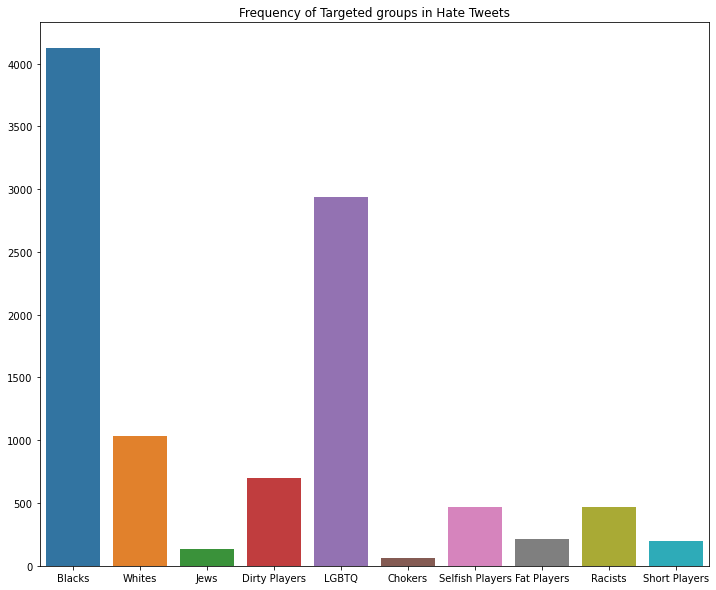

In [516]:
plt.figure(figsize = (12,10))
sns.barplot(y= list(Hated_People.values()), x = list(Hated_People.keys()),)
plt.title('Frequency of Targeted groups in Hate Tweets')

In [569]:
Reason_for_hate = {'racism':Hated_People['Blacks'] + Hated_People['Whites'] + Hated_People['Jews'],
                   'physique shaming':Hated_People['Fat Players'] + Hated_People['Short Players'],
                   'play style':Hated_People['Selfish Players'] + Hated_People['Chokers'],
                   'anti-LGBTQ':Hated_People['LGBTQ']}
Reason_for_hate

{'racism': 5289,
 'physique shaming': 411,
 'play style': 534,
 'anti-LGBTQ': 2940}

Text(0.5, 1.0, 'Frequency of topics in Hate Tweets')

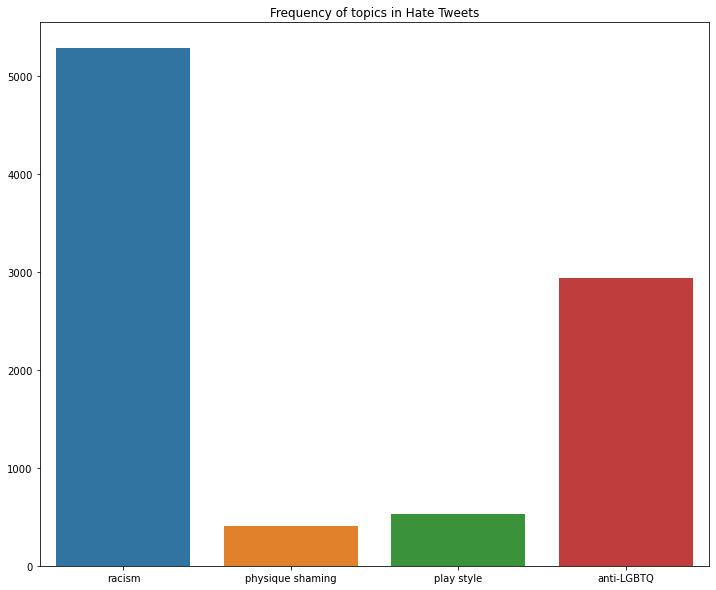

In [570]:
plt.figure(figsize = (12,10))
sns.barplot(y= list(Reason_for_hate.values()), x = list(Reason_for_hate.keys()),)
plt.title('Frequency of topics in Hate Tweets')

In [571]:
# top_50 = Nba_hated_df['Player'].tolist()
impact = ['MP', 'PTS', 'TRB', 'AST', 'STL',  'BLK'] 


nba_2017 = pd.read_csv('Nba_2017_stats.csv')
nba_2017['Player'] = nba_2017['Player'].apply(str.lower)
nba_2017 = nba_2017[nba_2017['Player'].isin(top_50)]
nba_2017 = nba_2017.drop_duplicates(subset='Player', keep="first")
nba_2017['impact'] = nba_2017[impact].sum(axis = 1)
nba_2017['TS%'] = (nba_2017['FT'] + nba_2017['FG'])/ (nba_2017['FTA'] + nba_2017['FGA'])
nba_2017.drop(['Rk', 'Tm', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK','PF', 'PTS',
       'Player-additional'],inplace = True, axis = 1)

nba_2018 = pd.read_csv('Nba_2018_stats.csv')
nba_2018['Player'] = nba_2018['Player'].apply(str.lower)
nba_2018 = nba_2018[nba_2018['Player'].isin(top_50)]
nba_2018 = nba_2018.drop_duplicates(subset='Player', keep="first")
nba_2018['impact'] = nba_2018[impact].sum(axis = 1)
nba_2018['TS%'] = (nba_2018['FT'] + nba_2018['FG'])/ (nba_2018['FTA'] + nba_2018['FGA'])
nba_2018.drop(['Rk', 'Tm', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK','PF', 'PTS',
       'Player-additional'],inplace = True, axis = 1)

nba_2019 = pd.read_csv('Nba_2019_stats.csv')
nba_2019['Player'] = nba_2019['Player'].apply(str.lower)
nba_2019 = nba_2019[nba_2019['Player'].isin(top_50)]
nba_2019 = nba_2019.drop_duplicates(subset='Player', keep="first")
nba_2019['impact'] = nba_2019[impact].sum(axis = 1)
nba_2019['TS%'] = (nba_2019['FT'] + nba_2019['FG'])/ (nba_2019['FTA'] + nba_2019['FGA'])
nba_2019.drop(['Rk', 'Tm', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK','PF', 'PTS',
       'Player-additional'],inplace = True, axis = 1)

nba_2020 = pd.read_csv('Nba_2020_stats.csv')
nba_2020['Player'] = nba_2020['Player'].apply(str.lower)
nba_2020 = nba_2020[nba_2020['Player'].isin(top_50)]
nba_2020 = nba_2020.drop_duplicates(subset='Player', keep="first")
nba_2020['impact'] = nba_2020[impact].sum(axis = 1)
nba_2020['TS%'] = (nba_2020['FT'] + nba_2020['FG'])/ (nba_2020['FTA'] + nba_2020['FGA'])
nba_2020.drop(['Rk', 'Tm', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK','PF', 'PTS',
       'Player-additional'],inplace = True, axis = 1)

nba_2021 = pd.read_csv('Nba_2021_stats.csv')
nba_2021['Player'] = nba_2021['Player'].apply(str.lower)
nba_2021 = nba_2021[nba_2021['Player'].isin(top_50)]
nba_2021 = nba_2021.drop_duplicates(subset='Player', keep="first")
nba_2021['impact'] = nba_2021[impact].sum(axis = 1)
nba_2021['TS%'] = (nba_2021['FT'] + nba_2021['FG'])/ (nba_2021['FTA'] + nba_2021['FGA'])
nba_2021.drop(['Rk', 'Tm', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK','PF', 'PTS',
       'Player-additional'],inplace = True, axis = 1)

nba_2022 = pd.read_csv('Nba_2021_stats.csv')
nba_2022['Player'] = nba_2022['Player'].apply(str.lower)
nba_2022 = nba_2022[nba_2022['Player'].isin(top_50)]
nba_2022 = nba_2022.drop_duplicates(subset='Player', keep="first")
nba_2022['impact'] = nba_2022[impact].sum(axis = 1)
nba_2022['TS%'] = (nba_2022['FT'] + nba_2022['FG'])/ (nba_2022['FTA'] + nba_2022['FGA'])
nba_2022.drop(['Rk', 'Tm', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK','PF', 'PTS',
       'Player-additional'],inplace = True, axis = 1)

In [520]:
nba_hated_stats = pd.concat([nba_2017,nba_2018,nba_2019,nba_2020,nba_2021,nba_2022])
nba_hated_stats = nba_hated_stats.groupby('Player').mean().reset_index()
nba_hated_stats

,Player,Age,G,GS,MP,TOV,impact,TS%
0,al horford,33.333333,62.166667,61.166667,29.483333,1.216667,54.566667,0.517327
1,andre drummond,26.333333,67.666667,55.166667,27.766667,2.383333,58.983333,0.550808
2,andrew wiggins,24.333333,71.000000,71.000000,33.766667,1.800000,61.150000,0.491765
3,anthony davis,26.333333,51.500000,51.500000,34.383333,2.166667,75.866667,0.592933
4,anthony edwards,19.666667,72.000000,66.333333,33.566667,2.466667,64.400000,0.496672
5,austin rivers,27.333333,62.500000,20.166667,25.250000,1.000000,39.150000,0.455052
6,ben simmons,22.500000,68.750000,68.750000,33.925000,3.350000,67.875000,0.572268
7,bradley beal,26.333333,60.166667,60.166667,36.166667,3.100000,74.066667,0.545449
8,brandon ingram,22.333333,57.333333,57.333333,33.916667,2.650000,66.466667,0.549033
9,chris paul,34.333333,64.333333,64.333333,32.083333,2.350000,63.966667,0.561771


In [521]:
Nba_hated_df = Nba_hated_df.reset_index(drop = True)
Nba_hated_df 

,Player,Twitter,no_of_hate_tweets_with_player_name,no_of_hate_tweets_with_player_handle,total_hate_tweets
0,anthony davis,antdavis23,3211,0,3211
1,ja morant,jamorant,2469,0,2469
2,anthony edwards,theantedwards_,2173,0,2173
3,lebron james,kingjames,784,315,1099
4,kyrie irving,kyrieirving,462,341,803
5,kevin durant,kdtrey5,539,259,798
6,russell westbrook,russwest44,596,141,737
7,jalen green,jalengreen,516,101,617
8,chris paul,cp3,562,0,562
9,draymond green,money23green,514,0,514


In [522]:
nba_hated_df = pd.merge(left = Nba_hated_df, right = nba_hated_stats, left_on = 'Player', right_on = 'Player')

In [523]:
nba_phy = pd.read_csv('all_seasons.csv')
#nba_phy = nba_phy[nba_phy['season']=='2021-22']
nba_phy.drop(['Unnamed: 0', 'team_abbreviation', 'age','college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'ts_pct', 'ast_pct', 'season'],axis = 1 , inplace = True)
nba_phy.columns = ['Player','height', 'weight','usage']
nba_phy['Player'] = nba_phy['Player'].apply(str.lower)
nba_phy = nba_phy[nba_phy['Player'].isin(top_50)]
nba_phy = nba_phy.groupby('Player').mean().reset_index()
nba_phy = nba_phy.reset_index(drop = True)
nba_phy_p = nba_phy['Player'].tolist()
[player for player in top_50 if player not in nba_phy_p]

[]

In [524]:
nba_phy['BMI'] = nba_phy['weight'] / ((nba_phy['height']/100) * (nba_phy['height']/100))

In [525]:
nba_hated_df = pd.merge(left = nba_hated_df, right = nba_phy, left_on = 'Player', right_on = 'Player')
nba_hated_df.drop(['no_of_hate_tweets_with_player_name','no_of_hate_tweets_with_player_handle'], axis = 1, inplace = True)
nba_hated_df['race']='black'
nba_hated_df.loc[nba_hated_df['Player'] == 'grayson allen', 'race']='white'
nba_hated_df.loc[nba_hated_df['Player'] == 'steven adams', 'race']='white'
nba_hated_df['weight_class'] = 'normal'
nba_hated_df.loc[nba_hated_df['BMI'].between(0, 18.5), 'weight_class'] = 'underweight'
nba_hated_df.loc[nba_hated_df['BMI'].between(18.5, 24.999), 'weight_class'] = 'normal'
nba_hated_df.loc[nba_hated_df['BMI'].between(25, 29.999), 'weight_class'] = 'overweight'
nba_hated_df




,Player,Twitter,total_hate_tweets,Age,G,GS,MP,TOV,impact,TS%,height,weight,usage,BMI,race,weight_class
0,anthony davis,antdavis23,3211,26.333333,51.500000,51.500000,34.383333,2.166667,75.866667,0.592933,208.534000,110.268215,0.277800,25.356926,black,overweight
1,ja morant,jamorant,2469,21.250000,61.000000,61.000000,32.450000,3.325000,68.600000,0.551319,190.500000,78.925008,0.284333,21.748268,black,normal
2,anthony edwards,theantedwards_,2173,19.666667,72.000000,66.333333,33.566667,2.466667,64.400000,0.496672,193.040000,102.058200,0.263000,27.387557,black,overweight
3,lebron james,kingjames,1099,35.333333,60.166667,60.166667,35.750000,3.733333,81.583333,0.563657,203.601053,112.443069,0.312947,27.125182,black,overweight
4,kyrie irving,kyrieirving,803,27.333333,43.166667,43.166667,34.700000,2.483333,73.416667,0.560722,189.807273,87.625727,0.290545,24.322373,black,normal
5,kevin durant,kdtrey5,798,31.400000,58.200000,57.600000,35.260000,3.260000,78.020000,0.622636,206.102857,106.270126,0.297643,25.017457,black,overweight
6,russell westbrook,russwest44,737,31.333333,71.833333,71.833333,35.550000,4.366667,78.033333,0.505214,190.500000,88.612437,0.314857,24.417698,black,normal
7,jalen green,jalengreen,617,19.000000,67.000000,67.000000,31.900000,2.000000,56.200000,0.502825,193.040000,84.368112,0.234000,22.640380,black,normal
8,chris paul,cp3,562,34.333333,64.333333,64.333333,32.083333,2.350000,63.966667,0.561771,183.029412,79.378600,0.233176,23.695270,black,normal
9,draymond green,money23green,514,29.333333,55.666667,55.000000,30.283333,2.800000,55.150000,0.517723,199.898000,104.326160,0.152700,26.108164,black,overweight


<AxesSubplot:>

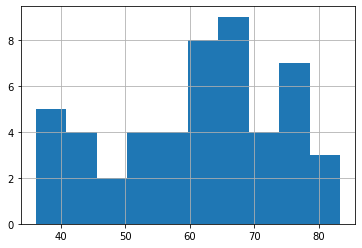

In [584]:
nba_hated_df.impact.hist()

In [582]:
nba_hated_df.corr().

,total_hate_tweets,Age,G,GS,MP,TOV,impact,TS%,height,weight,usage,BMI
total_hate_tweets,1.000000,-0.054980,-0.010458,0.180097,0.275530,0.186778,0.300300,0.137273,-0.026762,-0.000993,0.316797,0.018429
Age,-0.054980,1.000000,-0.078316,-0.028283,0.079820,0.026464,0.094728,0.194089,-0.080455,0.045373,-0.151994,0.151483
G,-0.010458,-0.078316,1.000000,0.399586,0.115071,0.048319,0.075262,0.006740,0.100963,-0.013703,-0.043418,-0.145647
GS,0.180097,-0.028283,0.399586,1.000000,0.771680,0.625198,0.730944,0.424488,0.274836,0.184775,0.376394,-0.006656
MP,0.275530,0.079820,0.115071,0.771680,1.000000,0.779042,0.929417,0.380996,0.091264,0.066545,0.658135,0.021115
TOV,0.186778,0.026464,0.048319,0.625198,0.779042,1.000000,0.855851,0.325278,0.006388,0.051752,0.762248,0.075565
impact,0.300300,0.094728,0.075262,0.730944,0.929417,0.855851,1.000000,0.551444,0.212087,0.198476,0.770931,0.092561
TS%,0.137273,0.194089,0.006740,0.424488,0.380996,0.325278,0.551444,1.000000,0.550382,0.547264,0.182054,0.270897
height,-0.026762,-0.080455,0.100963,0.274836,0.091264,0.006388,0.212087,0.550382,1.000000,0.790464,-0.088224,0.188282
weight,-0.000993,0.045373,-0.013703,0.184775,0.066545,0.051752,0.198476,0.547264,0.790464,1.000000,-0.049318,0.748778


<AxesSubplot:>

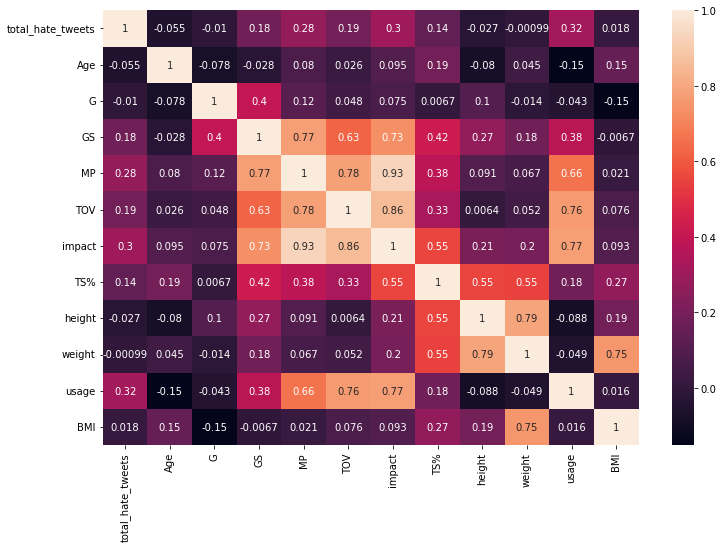

In [526]:
#heatmap showing the correlation of stats 
plt.figure(figsize = (12,8))
sns.heatmap(nba_hated_df.corr(),annot = True)
plt.title("Correlation heat Map")

<AxesSubplot:title={'center':'Correlation of Number of Hate Tweets to player stats and demographics'}>

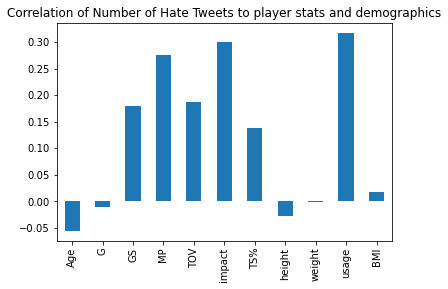

In [527]:
nba_hated_df.corr()['total_hate_tweets'].drop('total_hate_tweets', axis = 0).plot(kind = 'bar', title = 'Correlation of Number of Hate Tweets to player stats and demographics')

Number of Hate Tweets has a positive correlation with:
GS [Games Started]
MP [Minutes Played]
TOV ['Turnovers'] : How many times a player losses possesion
Impact ['Impact'] : A metric based on how many points, assists, steals, blocks, and rebounds a player averages
TS% :['True Shooting Percentage']: number of succesful shots/ number of attempted shots including free throws as a percentage
usage: How often the player touches the ball per game

Text(0.5, 1.0, 'Racial Profile of Hated Players')

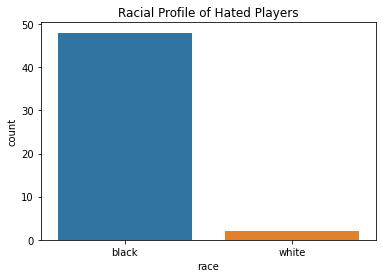

In [564]:
sns.countplot(data = nba_hated_df, x = 'race')
plt.title('Racial Profile of Hated Players')

<AxesSubplot:xlabel='weight_class', ylabel='count'>

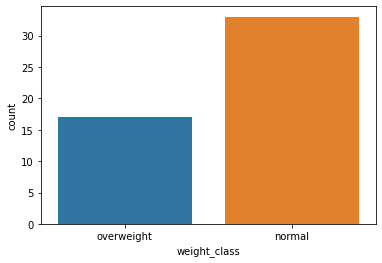

In [572]:
sns.countplot(data = nba_hated_df, x = 'weight_class')

In [586]:
nba_hated_df['weight_class'].value_counts()

normal        33
overweight    17
Name: weight_class, dtype: int64

In [580]:
kmean = KMedoids(n_clusters = 4)
kmean.fit(nba_hated_df[['TOV', 'impact', 'usage']])
kmean_df = nba_hated_df[['TOV', 'impact', 'usage']]
kmean_df['label'] = kmean.labels_

/var/folders/h8/14z0wbb515x4bbvntj6h5kp40000gn/T/ipykernel_66259/1843935061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmean_df['label'] = kmean.labels_


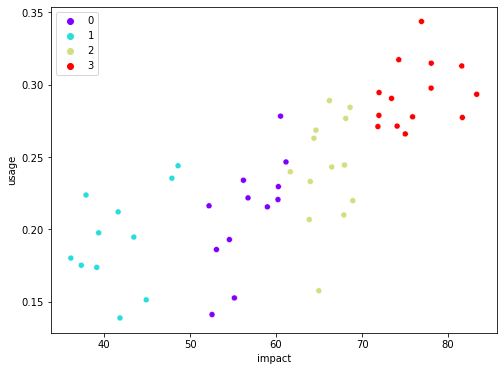

In [581]:
#Visualize clusters
plt.figure(figsize = (8, 6))
sns.scatterplot(data= kmean_df, x = 'impact', y = 'usage', hue = kmean.labels_ ,  palette = 'rainbow', )
plt.legend()

In [537]:
hated_pl = list(hated_players_dict.keys())
hated_ac = list(hated_accounts_dict.keys())
hated_pl = hated_pl + hated_ac
hated_pl = [pl for pl in hated_pl if pl not in remove_players]
hated_pl

['kevin huerter',
 'frank ntilikina',
 'jalen green',
 'jalen duren',
 'danuel house jr.',
 'christian wood',
 'wendell carter jr.',
 'kevin durant',
 'davis bertans',
 'jordan clarkson',
 'dennis smith jr.',
 'tyty washington jr.',
 'malcolm brogdon',
 'joel embiid',
 'patty mills',
 'patrick beverley',
 'andre drummond',
 'jordan schakel',
 'will barton',
 'ben simmons',
 'troy brown jr.',
 'isaiah livers',
 'vince williams jr.',
 'derrick rose',
 'deandre ayton',
 'jordan goodwin',
 'jalen brunson',
 'jimmy butler',
 'jordan hall',
 'anthony davis',
 'isaiah stewart',
 'jordan nwora',
 'frank kaminsky',
 'doug mcdermott',
 'greg brown iii',
 'ron harper jr.',
 'john konchar',
 'andrew wiggins',
 'austin rivers',
 'jerami grant',
 'kyle lowry',
 'derrick jones jr.',
 'al horford',
 'ja morant',
 'jamal cain',
 'draymond green',
 'john butler jr.',
 'christian braun',
 'george hill',
 'jaren jackson jr.',
 'lebron james',
 'paul reed',
 'julius randle',
 'scotty pippen jr.',
 'dejount

In [540]:
player_hate_tweets = set()
for tweet in hate_tweets:
    tweet_l = tweet.lower()
    for player in hated_pl:
        if player in tweet_l:
            player_hate_tweets.add(tweet_l)
            break
len(player_hate_tweets)

6846

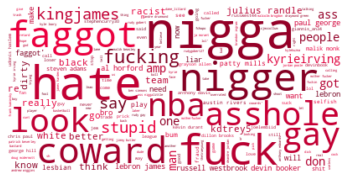

In [547]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("RT")
stopwords.add('https')
stopwords.add(" ")
stopwords.add('')
stopwords.add("&amp;")
stopwords.add('t')
stopwords.add('s')
stopwords.add('CO')
stopwords.add('u')
stopwords.add('n')

import random

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 344
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(player_hate_tweets))
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [563]:
print(top_50)

['anthony davis', 'ja morant', 'anthony edwards', 'lebron james', 'kyrie irving', 'kevin durant', 'russell westbrook', 'jalen green', 'chris paul', 'draymond green', 'devin booker', 'trae young', 'paul george', 'deandre jordan', 'stephen curry', 'joel embiid', 'george hill', "d'angelo russell", 'jaylen brown', 'rudy gobert', 'patty mills', 'julius randle', 'al horford', 'dejounte murray', 'karl-anthony towns', 'steven adams', 'grayson allen', 'james harden', 'malik monk', 'austin rivers', 'jalen suggs', 'andrew wiggins', 'gary trent jr.', 'jerami grant', 'patrick beverley', 'john wall', 'dillon brooks', 'jimmy butler', 'bradley beal', 'giannis antetokounmpo', 'andre drummond', "de'aaron fox", 'christian wood', 'ben simmons', 'kyle lowry', 'malcolm brogdon', 'malik beasley', 'zion williamson', 'brandon ingram', 'kyle kuzma']


In [587]:
nba_hated_df.to_csv('nba_hated.csv')